In [6]:
# ============================
# Import Dataset
# ============================
import pandas as pd
file_path = "sample_philippines_plate. csv"
df = pd.read_csv(file_path)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)
print(df)

            Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/02/15  13.00  125.79   33.0  6.1     322   39   -73  01:54:23.1   
1     1976/06/07  14.09  124.83   33.0  6.4     249   67   180  07:36:55.4   
2     1976/06/15   0.54  134.79   33.0  6.3      86   87    -1  06:09:01.8   
3     1976/06/26   3.66  126.75   33.0  6.5     169   26    69  10:30:59.4   
4     1976/08/16   6.26  124.02   33.0  7.9     341   35    92  16:11:07.3   
...          ...    ...     ...    ...  ...     ...  ...   ...         ...   
8356  2020/12/25   5.05  125.91  100.6  5.1     125   44    16  02:00:33.4   
8357  2020/12/25  13.30  122.33   10.0  5.4     313   79    10  10:04:34.3   
8358  2020/12/26  22.47  142.89  178.1  4.8      10   30    49  09:53:50.3   
8359  2020/12/29   5.26  125.30   35.0  5.3     352    7   107  16:21:48.1   
8360  2020/12/30  36.49  140.58   50.0  5.2     200   32    92  00:35:28.4   

                    Datetime  
0    1976-02-15 01:54:23.100  
1

In [7]:
# ===============================================
# Gardner and Knopoff Window Method (1974)
# ===============================================

In [8]:
# --- Step 1: Run the declustering algorithm ---
from gk_decluster import window_decluster, get_valid_clusters, get_mainshocks
clustered_catalog = window_decluster(df)
print(clustered_catalog)  # This catalogue contains mainshocks, dependent shocks and noise

            Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/02/15  13.00  125.79   33.0  6.1     322   39   -73  01:54:23.1   
1     1976/06/07  14.09  124.83   33.0  6.4     249   67   180  07:36:55.4   
2     1976/06/15   0.54  134.79   33.0  6.3      86   87    -1  06:09:01.8   
3     1976/06/26   3.66  126.75   33.0  6.5     169   26    69  10:30:59.4   
4     1976/08/16   6.26  124.02   33.0  7.9     341   35    92  16:11:07.3   
...          ...    ...     ...    ...  ...     ...  ...   ...         ...   
8356  2020/12/25   5.05  125.91  100.6  5.1     125   44    16  02:00:33.4   
8357  2020/12/25  13.30  122.33   10.0  5.4     313   79    10  10:04:34.3   
8358  2020/12/26  22.47  142.89  178.1  4.8      10   30    49  09:53:50.3   
8359  2020/12/29   5.26  125.30   35.0  5.3     352    7   107  16:21:48.1   
8360  2020/12/30  36.49  140.58   50.0  5.2     200   32    92  00:35:28.4   

                    Datetime             x             y  is_de

In [9]:
# --- Step 2: Identify valid clusters (size >= 2) ---
valid_cluster_ids = get_valid_clusters(clustered_catalog)
print(f"--- Identified Valid Cluster IDs (size >= 2) ---\n{valid_cluster_ids.to_list()}\n")

--- Identified Valid Cluster IDs (size >= 2) ---
[0, 2, 3, 4, 6, 7, 9, 11, 17, 19, 22, 23, 36, 38, 39, 40, 43, 47, 52, 62, 68, 74, 80, 85, 86, 94, 102, 108, 117, 121, 123, 125, 126, 131, 135, 139, 146, 149, 150, 152, 160, 162, 170, 179, 180, 186, 191, 192, 200, 205, 207, 220, 223, 226, 227, 228, 243, 256, 258, 266, 269, 273, 275, 279, 290, 296, 303, 305, 308, 311, 315, 317, 321, 323, 324, 331, 332, 339, 341, 347, 355, 356, 364, 366, 370, 372, 376, 377, 380, 382, 383, 387, 388, 396, 406, 407, 409, 417, 419, 422, 423, 425, 430, 432, 436, 438, 440, 442, 448, 450, 451, 460, 467, 473, 474, 475, 476, 477, 480, 482, 486, 490, 491, 494, 505, 507, 508, 519, 523, 526, 528, 532, 535, 536, 539, 540, 543, 544, 545, 551, 552, 564, 578, 587, 589, 593, 594, 597, 598, 602, 603, 609, 611, 612, 613, 614, 621, 622, 627, 630, 631, 636, 652, 662, 665, 666, 667, 670, 671, 672, 673, 676, 679, 682, 683, 689, 692, 693, 696, 698, 699, 701, 704, 708, 712, 714, 715, 717, 723, 727, 730, 735, 736, 742, 743, 745, 758

In [10]:
# Filter the catalog to only include events from these valid clusters
sequences_df = clustered_catalog[clustered_catalog['ClusterID'].isin(valid_cluster_ids)]
print("--- DataFrame excluded noise ---")
print(sequences_df[['Datetime', 'Mag', 'ClusterID']])

--- DataFrame excluded noise ---
                    Datetime  Mag  ClusterID
0    1976-02-15 01:54:23.100  6.1          0
2    1976-06-15 06:09:01.800  6.3          2
3    1976-06-26 10:30:59.400  6.5          3
4    1976-08-16 16:11:07.300  7.9          4
6    1976-08-17 04:19:27.300  6.8          6
...                      ...  ...        ...
8345 2020-12-16 21:44:52.600  4.8       3849
8349 2020-12-20 11:40:44.400  4.9       3850
8351 2020-12-22 13:37:53.800  5.0       4141
8355 2020-12-24 23:43:41.900  6.3       4126
8359 2020-12-29 16:21:48.100  5.3       4154

[5540 rows x 3 columns]


In [11]:
# --- Step 3: Identify the clusters ---
final_catalog = get_mainshocks(sequences_df)
print("--- Final Catalog with Mainshocks Identified ---")
print("Count:", len(final_catalog))
print(final_catalog[['Datetime', 'Mag', 'ClusterID', 'Type']])

--- Final Catalog with Mainshocks Identified ---
Count: 5540
                    Datetime  Mag  ClusterID       Type
0    1976-02-15 01:54:23.100  6.1          0  Mainshock
2    1976-06-15 06:09:01.800  6.3          2  Mainshock
3    1976-06-26 10:30:59.400  6.5          3  Mainshock
4    1976-08-16 16:11:07.300  7.9          4  Mainshock
6    1976-08-17 04:19:27.300  6.8          6  Dependent
...                      ...  ...        ...        ...
8345 2020-12-16 21:44:52.600  4.8       3849  Dependent
8349 2020-12-20 11:40:44.400  4.9       3850  Dependent
8351 2020-12-22 13:37:53.800  5.0       4141  Dependent
8355 2020-12-24 23:43:41.900  6.3       4126  Mainshock
8359 2020-12-29 16:21:48.100  5.3       4154  Dependent

[5540 rows x 4 columns]


In [12]:
# --- Step 4: Display only the mainshocks ---
mainshocks_only = final_catalog[final_catalog['Type'] == 'Mainshock'].copy()
print("--- Mainshocks of Valid Sequences ---")
print(mainshocks_only[['Datetime', 'Mag', 'ClusterID']])

--- Mainshocks of Valid Sequences ---
                    Datetime  Mag  ClusterID
0    1976-02-15 01:54:23.100  6.1          0
2    1976-06-15 06:09:01.800  6.3          2
3    1976-06-26 10:30:59.400  6.5          3
4    1976-08-16 16:11:07.300  7.9          4
8    1976-11-07 17:09:06.100  6.8          7
...                      ...  ...        ...
8318 2020-11-12 19:19:48.000  5.1       4093
8323 2020-11-15 22:37:43.700  6.0       4096
8339 2020-12-10 13:19:58.700  6.1       4125
8344 2020-12-15 23:21:57.800  6.1       4154
8355 2020-12-24 23:43:41.900  6.3       4126

[1345 rows x 3 columns]


In [13]:
# ========================================
# Estimation and further data exploration
# ========================================

In [14]:
# Visualise the clustered sequence on map
import plotly.express as px

sequences_df['Cluster'] = sequences_df['ClusterID'].astype('category')

fig = px.scatter_map(
    sequences_df,
    lat='Lat',
    lon='Lon',
    hover_name='ClusterID',
    color='Cluster',
    color_continuous_scale='Edge',
    hover_data={'Date', 'Time', 'Lat', 'Lon'},
    zoom=3,
    height=800,
    map_style='carto-positron',
    title='Earthquake Clustering using Gardner and Knopoff Window Method (1974)<br><sup>Time of occurrence: 1976-2020 | Philippine Plate</sup>'
)

fig.show()

/var/folders/fn/9d0nx8h147x36gzgyptphd8w0000gn/T/ipykernel_37769/3123179484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequences_df['Cluster'] = sequences_df['ClusterID'].astype('category')


In [15]:
# Compute inter-arrival timesCompute inter-arrival times to second
mainshocks_only['inter_arrival'] = mainshocks_only['Datetime'].diff().dt.total_seconds()
print(mainshocks_only.head())

         Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0  1976/02/15  13.00  125.79   33.0  6.1     322   39   -73  01:54:23.1   
2  1976/06/15   0.54  134.79   33.0  6.3      86   87    -1  06:09:01.8   
3  1976/06/26   3.66  126.75   33.0  6.5     169   26    69  10:30:59.4   
4  1976/08/16   6.26  124.02   33.0  7.9     341   35    92  16:11:07.3   
8  1976/11/07   8.48  126.38   60.0  6.8     162   39    49  17:09:06.1   

                 Datetime              x             y  is_dependent  \
0 1976-02-15 01:54:23.100 -502657.567595  1.455379e+06         False   
2 1976-06-15 06:09:01.800  476633.235992  5.968665e+04         False   
3 1976-06-26 10:30:59.400 -419336.163270  4.087930e+05         False   
4 1976-08-16 16:11:07.300 -721934.076686  7.048322e+05         False   
8 1976-11-07 17:09:06.100 -452237.638916  9.479865e+05         False   

   ClusterID       Type  inter_arrival  
0          0  Mainshock            NaN  
2          2  Mainshock     104696

In [16]:
# The Statistic Features of the Mainshock Sequence
print("--- The Statistic Features of the Mainshock Sequence ---")
print("The declustered catalogue contains {} events.".format(len(mainshocks_only)))

max_interval_days = round(mainshocks_only['inter_arrival'].max() / (24*60*60))
print("The maximum interarrival time between two neighbour independent events is {} days.".format(max_interval_days))

min_interval_min = round(mainshocks_only['inter_arrival'].min() / 60)
print("The minimum interarrival time between two neighbour independent events is {} minutes.".format(min_interval_min))

--- The Statistic Features of the Mainshock Sequence ---
The declustered catalogue contains 1345 events.
The maximum interarrival time between two neighbour independent events is 145 days.
The minimum interarrival time between two neighbour independent events is 10 minutes.


In [17]:
# Visualise the declustered mainshock sequence on map
import plotly.express as px

fig_mainshock = px.scatter_map(
    mainshocks_only,
    lat='Lat',
    lon='Lon',
    hover_name='Mag',
    size='Mag',
    size_max=8,
    color='Mag',
    color_continuous_scale='orrd',
    hover_data={'Date', 'Time', 'Lat', 'Lon'},
    zoom=3,
    height=800,
    map_style='carto-positron',
    title='Declustered Mainshock Sequence using Gardner and Knopoff Window Method (1974)<br><sup>Philippine Plate (1976-2020)</sup>'
)

fig_mainshock.show()

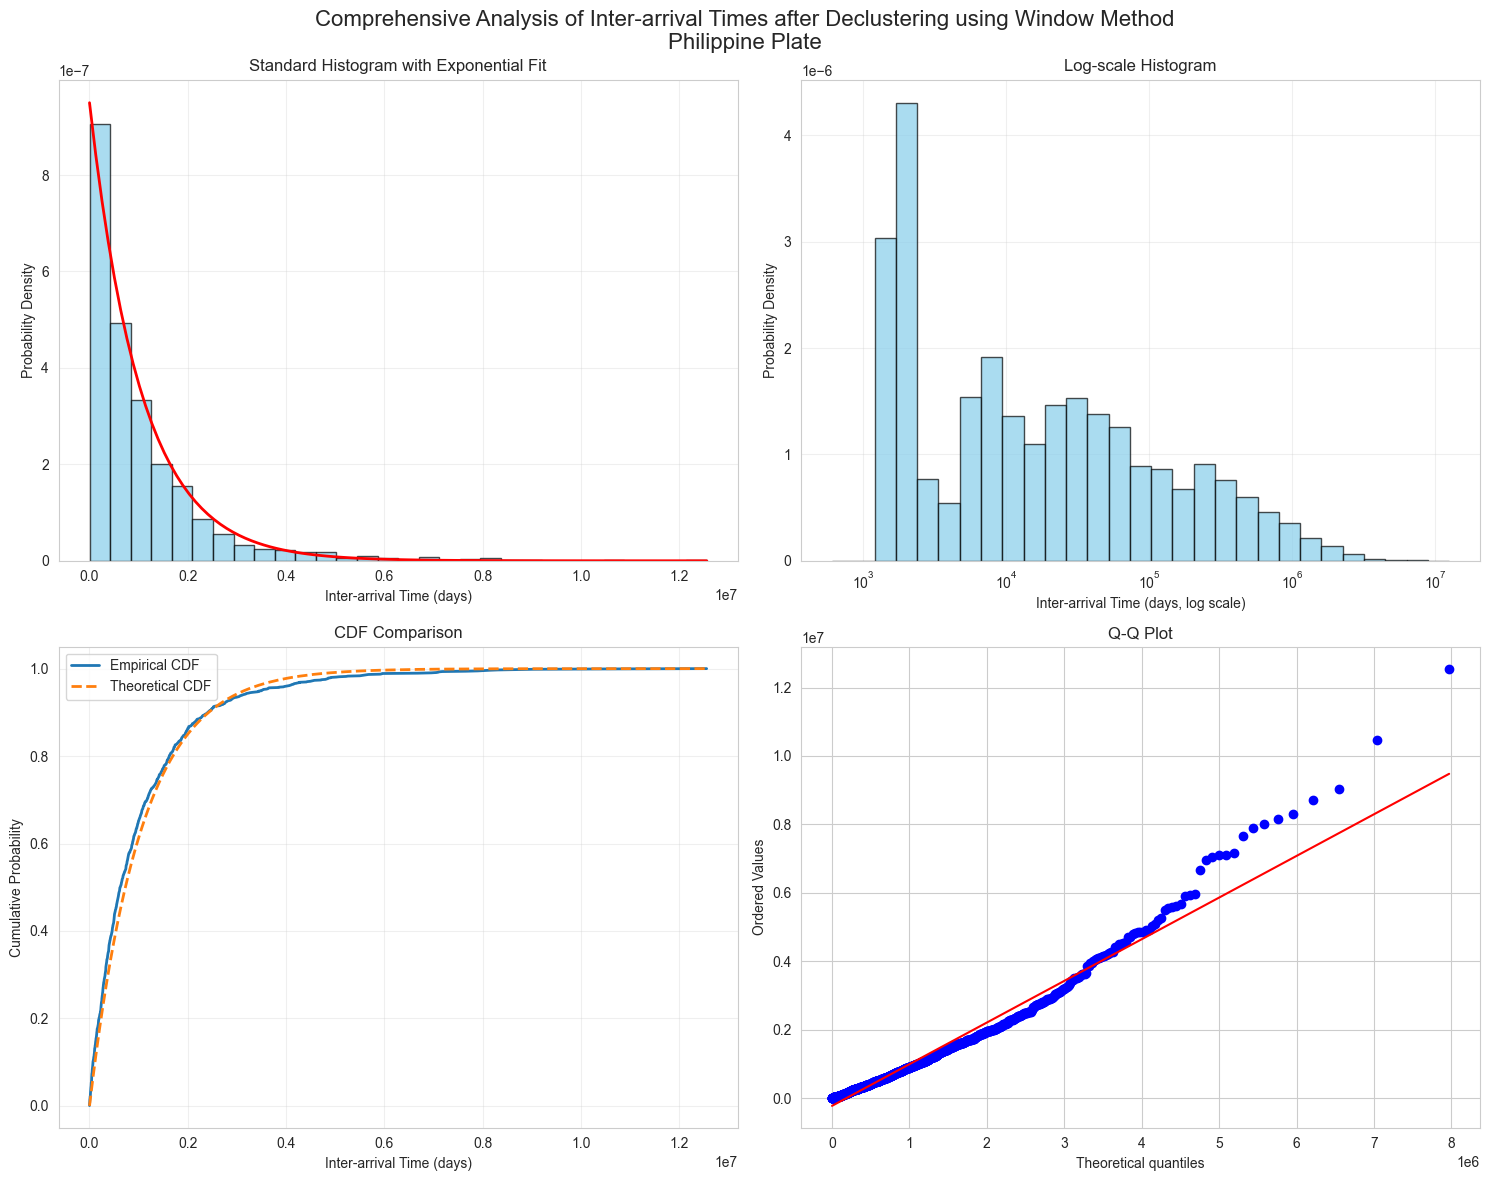

In [24]:
# Visualisation: The inter_arrival times are expected to fit an exponential distribution
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
from scipy.stats import probplot

x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)

# Comprehensive analysis for the raw catalogue
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standard Histogram with Exponential Fit (Top-Left)
axes[0, 0].hist(x, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_range = np.linspace(x.min(), x.max(), 100)
axes[0, 0].plot(x_range, expon.pdf(x_range, loc, scale), 'r-', lw=2)
axes[0, 0].set_title('Standard Histogram with Exponential Fit')
axes[0, 0].set_xlabel('Inter-arrival Time (days)')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].grid(True, alpha=0.3)

# Log-scale Histogram (Top-Right)
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 30)
axes[0, 1].hist(x, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_xscale('log')
axes[0, 1].set_title('Log-scale Histogram')
axes[0, 1].set_xlabel('Inter-arrival Time (days, log scale)')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].grid(True, alpha=0.3)

# CDF Comparison (Bottom-Left)
x_sorted = np.sort(x)
y_ecdf = np.arange(1, len(x_sorted)+1) / len(x_sorted)
y_theoretical = expon.cdf(x_sorted, loc, scale)
axes[1, 0].plot(x_sorted, y_ecdf, label='Empirical CDF', linewidth=2)
axes[1, 0].plot(x_sorted, y_theoretical, label='Theoretical CDF', linestyle='--', linewidth=2)
axes[1, 0].set_title('CDF Comparison')
axes[1, 0].set_xlabel('Inter-arrival Time (days)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Q-Q Plot (Bottom-Right)
probplot(x, dist=expon, sparams=(loc, scale), plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.savefig('comprehensive_analysis_philippine_window.png', dpi=300, bbox_inches='tight')
plt.suptitle('Comprehensive Analysis of Inter-arrival Times after Declustering using Window Method\nPhilippine Plate', fontsize=16)
plt.tight_layout()
plt.show()

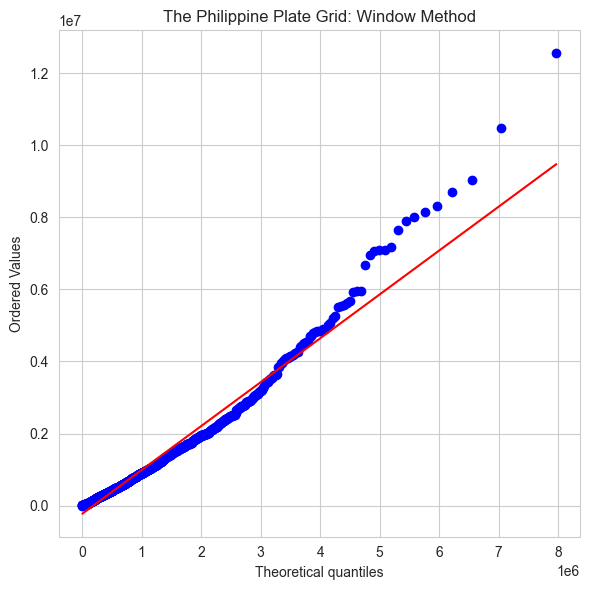

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import probplot

x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)

plt.figure(figsize=(6, 6))
probplot(x, dist=expon, sparams=(loc, scale), plot=plt)
plt.title("The Philippine Plate Grid: Window Method")
plt.tight_layout()
plt.savefig("qq_philippine_window.png", dpi=300)
plt.show()

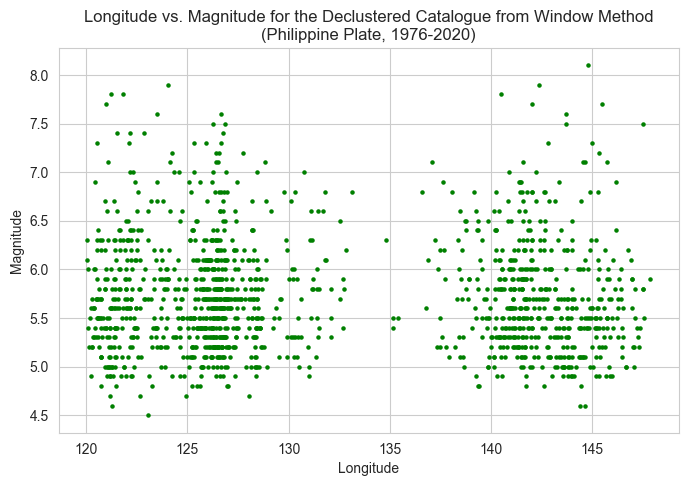

In [20]:
# Lon vs Mag
import matplotlib.pyplot as plt

x = mainshocks_only['Lon']
y = mainshocks_only['Mag']

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=5, color='green')
plt.xlabel("Longitude")
plt.ylabel("Magnitude")
plt.title("Longitude vs. Magnitude for the Declustered Catalogue from Window Method\n(Philippine Plate, 1976-2020)")
plt.show()

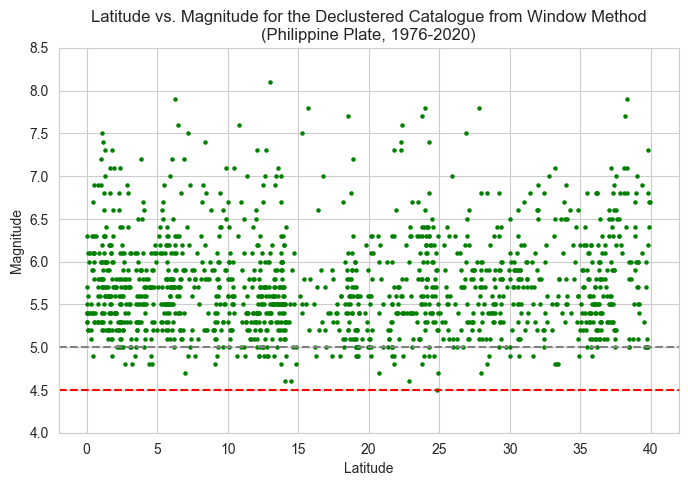

In [25]:
# Lat vs Mag
import matplotlib.pyplot as plt

x = mainshocks_only['Lat']
y = mainshocks_only['Mag']

plt.figure(figsize=(8, 5))
plt.ylim(4, 8.5)
plt.scatter(x, y, s=5, color='green')
plt.axhline(y=4.5, color='red', linestyle='--')  # Observing the minor magnitude(<4.5) events for comparison
plt.axhline(y=5, color='grey', linestyle='--')  # Observing the minor magnitude events(<5) for comparison
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.title("Latitude vs. Magnitude for the Declustered Catalogue from Window Method\n(Philippine Plate, 1976-2020)")
plt.show()

In [22]:
# KS test
from scipy.stats import kstest, expon

x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)
stat, p_value = kstest(x, 'expon', args=(loc, scale))

# If p_value > 0.05, the inter-arrival times are consistent with an exponential distribution.
# This implies that the earthquake occurrences follow a Poisson process.
print(f"K-S test p-value: {p_value:.4f}")
print(f"K-S Test Statistic (D): {stat:.4f}")

METHOD_NAME = "Window Method"
if p_value > 0.05:
    # We fail to reject the null hypothesis.
    print(f"The declustered mainshock sequence from the {METHOD_NAME} method is consistent with a Poisson process.")
else:
    # We reject the null hypothesis.
    print(f"The declustered mainshock sequence from the {METHOD_NAME} method is not consistent with a Poisson process.")

K-S test p-value: 0.0005
K-S Test Statistic (D): 0.0555
The declustered mainshock sequence from the Window Method method is not consistent with a Poisson process.
